2023-12-30 10:06:52,985 - INFO - Cargando datos desde speech.xlsx...
2023-12-30 10:06:53,737 - INFO - Describiendo los datos...
2023-12-30 10:06:53,748 - INFO -        id_speech         year
count    14.0000    14.000000
mean      7.5000  2019.500000
std       4.1833     3.031882
min       1.0000  2014.000000
25%       4.2500  2017.250000
50%       7.5000  2020.500000
75%      10.7500  2022.000000
max      14.0000  2023.000000
2023-12-30 10:06:53,756 - INFO - Cargando datos desde sentence.xlsx...
2023-12-30 10:06:54,211 - INFO - Describiendo los datos...
2023-12-30 10:06:54,225 - INFO -        id_sentence   id_speech  sentence_number  sentence_length_raw  \
count  2802.000000  2802.00000      2802.000000          2802.000000   
mean   1401.500000     8.66167       192.475018            22.589579   
std     809.012052     3.12978       206.275706           137.638403   
min       1.000000     1.00000         1.000000             1.000000   
25%     701.250000     7.00000        59.00000

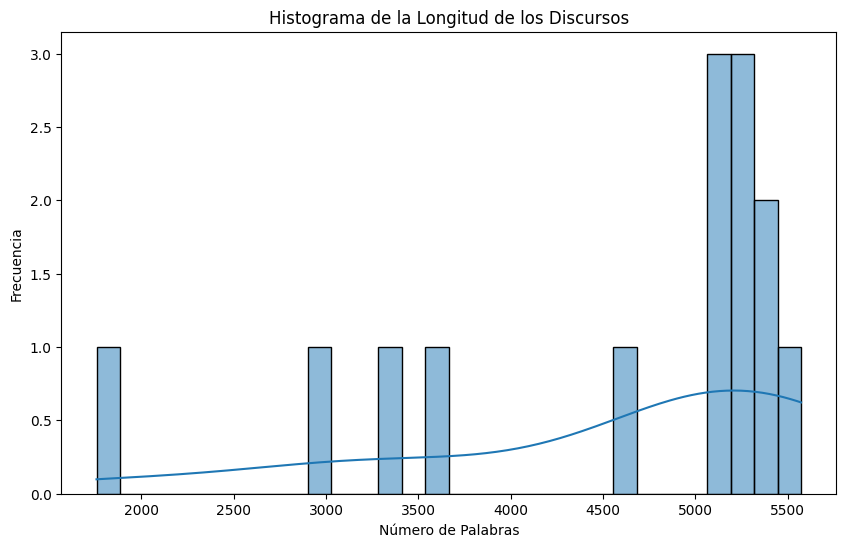

In [1]:
# notebooks/03_Pre_Analysis.ipynb
# Importaciones
import os
import sys
import logging
import pandas as pd

# Configuración del entorno del notebook
notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)

# Añadir el directorio raíz del proyecto a sys.path para importaciones
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from initialize import set_global_logging  # Importa la función de configuración de logging global
from config import XLSX_DIRECTORY
from utils.file_utils import read_excel_file
from utils.visualization_utils import (
    create_histogram,
    create_wordcloud,
    create_bar_chart,
    create_countplot,
    create_boxplot
)

# Configurar logging globalmente
set_global_logging()

# Funciones de ayuda para el EDA
def load_and_describe_data(file_name):
    logging.info(f"Cargando datos desde {file_name}...")
    df = read_excel_file(os.path.join(XLSX_DIRECTORY, file_name))
    logging.info("Describiendo los datos...")
    logging.info(df.describe())
    return df

def perform_eda(df_speeches, df_sentences):
    # Aquí se puede llamar a las funciones de visualización y análisis
    # Por ejemplo:
    logging.info("Creando visualizaciones...")
    create_histogram(df_speeches['text_raw'].str.split().str.len(), "Histograma de la Longitud de los Discursos", "Número de Palabras", "Frecuencia")
    # ... y así sucesivamente con las demás visualizaciones y análisis.

def main():
    # Carga y describe los datos de los discursos
    df_speeches = load_and_describe_data("speech.xlsx")
    
    # Carga y describe los datos de las oraciones
    df_sentences = load_and_describe_data("sentence.xlsx")
    
    # Realizar el análisis exploratorio de datos
    perform_eda(df_speeches, df_sentences)

# Ejecutar el proceso principal
if __name__ == "__main__":
    main()
